In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import style
style.use('fivethirtyeight')

import pandas_datareader.data as web
import datetime as dt

# Getting data from Yahoo Finance

In [2]:
start = dt.datetime(2016,1,1)
end = dt.datetime(2019,12,31)

In [3]:
#Amazon
amazon = web.DataReader('AMZN', 'yahoo', start, end)

#Google
google = web.DataReader('GOOG', 'yahoo', start, end)

#Facebook
facebook = web.DataReader('FB', 'yahoo', start, end)

In [4]:
amazon.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,657.719971,627.510010,656.289978,636.989990,9314500,636.989990
2016-01-05,646.909973,627.650024,646.859985,633.789978,5822600,633.789978
2016-01-06,639.789978,620.309998,622.000000,632.650024,5329200,632.650024
2016-01-07,630.000000,605.210022,621.799988,607.940002,7074900,607.940002
2016-01-08,624.140015,606.000000,619.659973,607.049988,5512900,607.049988


In [5]:
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,744.059998,731.257996,743.000000,741.840027,3272800,741.840027
2016-01-05,752.000000,738.640015,746.450012,742.580017,1950700,742.580017
2016-01-06,747.179993,728.919983,730.000000,743.619995,1947000,743.619995
2016-01-07,738.500000,719.059998,730.309998,726.390015,2963700,726.390015
2016-01-08,733.229980,713.000000,731.450012,714.469971,2450900,714.469971


In [6]:
facebook.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,102.239998,99.750000,101.949997,102.220001,37912400,102.220001
2016-01-05,103.709999,101.669998,102.889999,102.730003,23258200,102.730003
2016-01-06,103.769997,100.900002,101.129997,102.970001,25096200,102.970001
2016-01-07,101.430000,97.300003,100.500000,97.919998,45172900,97.919998
2016-01-08,100.500000,97.029999,99.879997,97.330002,35402300,97.330002


# Plot some basic stocks statisticks

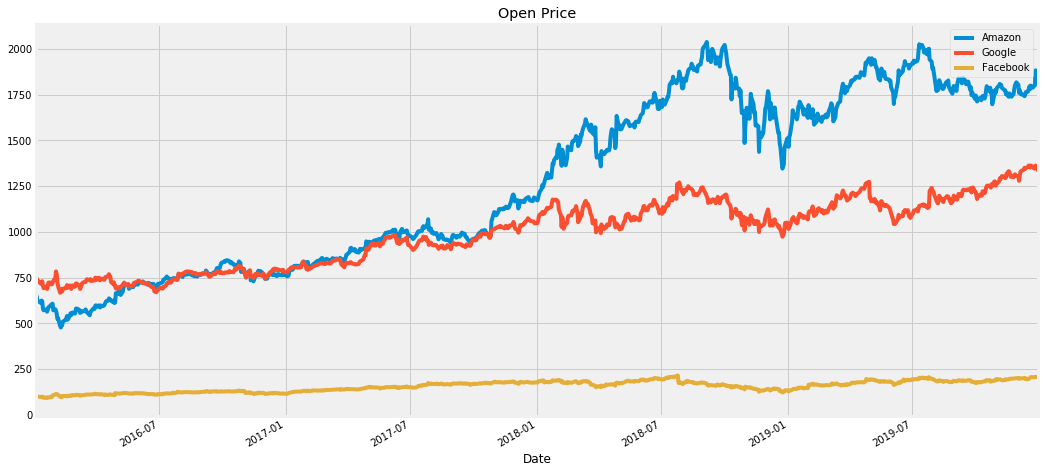

In [7]:
# Plot openin prices
amazon['Open'].plot(label='Amazon', figsize=(16,8), title='Open Price')
google['Open'].plot(label='Google')
facebook['Open'].plot(label='Facebook')
plt.legend()
plt.show()

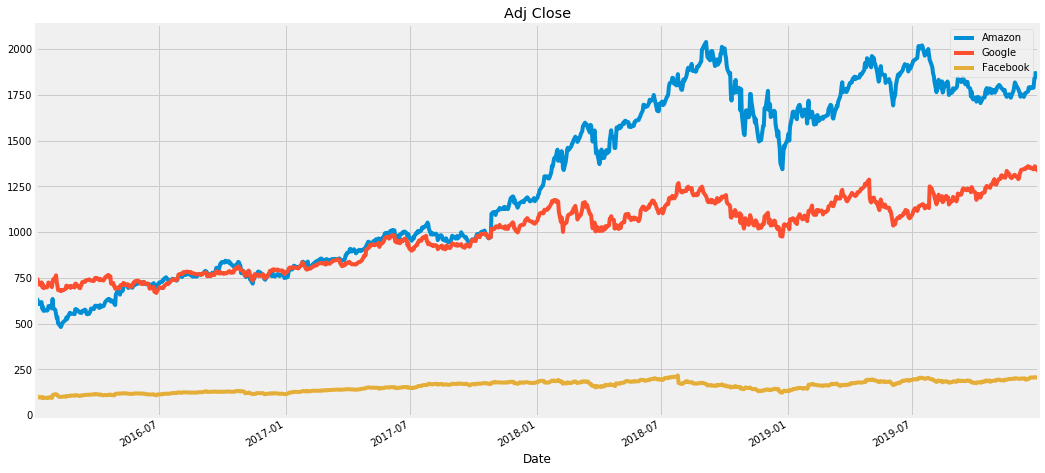

In [8]:
#Adj Close Price
amazon['Adj Close'].plot(label='Amazon', figsize=(16,8), title='Adj Close')
google['Adj Close'].plot(label='Google')
facebook['Adj Close'].plot(label='Facebook')
plt.legend()
plt.show()

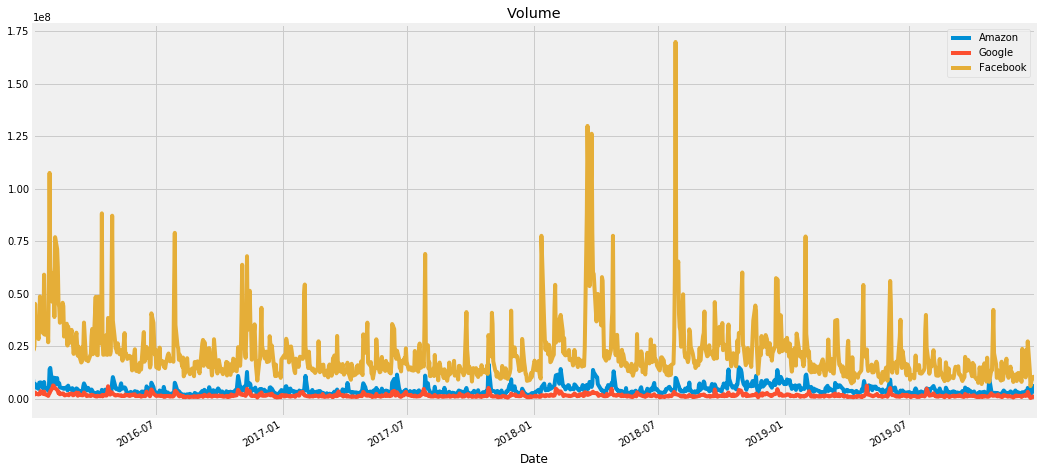

In [9]:
#Volume
amazon['Volume'].plot(label='Amazon', figsize=(16,8), title='Volume')
google['Volume'].plot(label='Google')
facebook['Volume'].plot(label='Facebook')
plt.legend()
plt.show()

In [10]:
amazon['Volume'].idxmax()

Timestamp('2017-10-27 00:00:00')

- Wall Street analysts are growing more confident Amazon’s success will continue because of its proven ability to invest in new opportunities.

- “Once again it demonstrated accelerating growth across all e-commerce reporting segments,” a Credit Suisse analyst wrote in a note to clients.

- Amazon shares jumped more than 13 percent to above $1100 for first time ever.
 
More in article:
https://www.cnbc.com/2017/10/27/amazon-shares-jump-as-internet-giants-massive-investments-pay-off-analysts.html

In [11]:
google['Volume'].idxmax()

Timestamp('2016-02-02 00:00:00')

In this day google passed up Apple as the world's most valuable company.

More in the article:
https://www.nasdaq.com/articles/why-googles-stock-has-higher-valuation-apples-aapl-2016-02-02

In [12]:
facebook['Volume'].idxmax()

Timestamp('2018-07-26 00:00:00')

- The company missed projections on key metrics after struggling with data leaks and fake news scandals.

- The stock is flirting with bear market territory — nearly 20 percent off its 52-week high — after having clawed its way back from those levels hit on the heels of the Cambridge Analytica privacy scandal earlier this year.

More in the article:
https://www.cnbc.com/2018/07/26/facebook-is-on-pace-for-its-worst-day-ever.html

Let's check orientation amount of money traded on each stock.

In [13]:
amazon['Total Traded'] = amazon['Open'] * amazon['Volume']
google['Total Traded'] = google['Open'] * google['Volume']
facebook['Total Traded'] = facebook['Open'] * facebook['Volume']

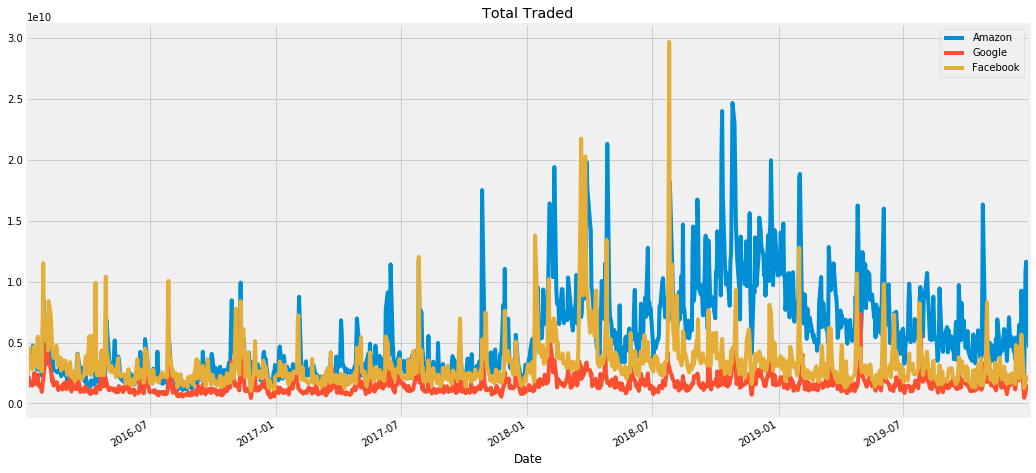

In [14]:
amazon['Total Traded'].plot(label='Amazon', figsize=(16,8), title = 'Total Traded')
google['Total Traded'].plot(label = 'Google')
facebook['Total Traded'].plot(label='Facebook')
plt.legend()
plt.show()

# Moving Averages

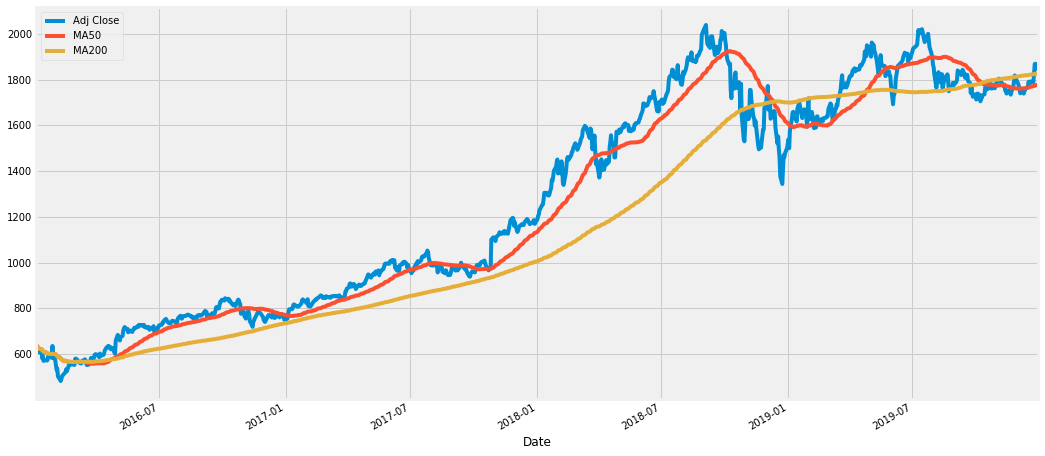

In [15]:
amazon['MA50'] = amazon['Adj Close'].rolling(50, min_periods=0).mean()
amazon['MA200'] = amazon['Adj Close'].rolling(200, min_periods=0).mean()
amazon[['Adj Close', 'MA50', 'MA200']].plot(label='Amazon', figsize=(16,8))

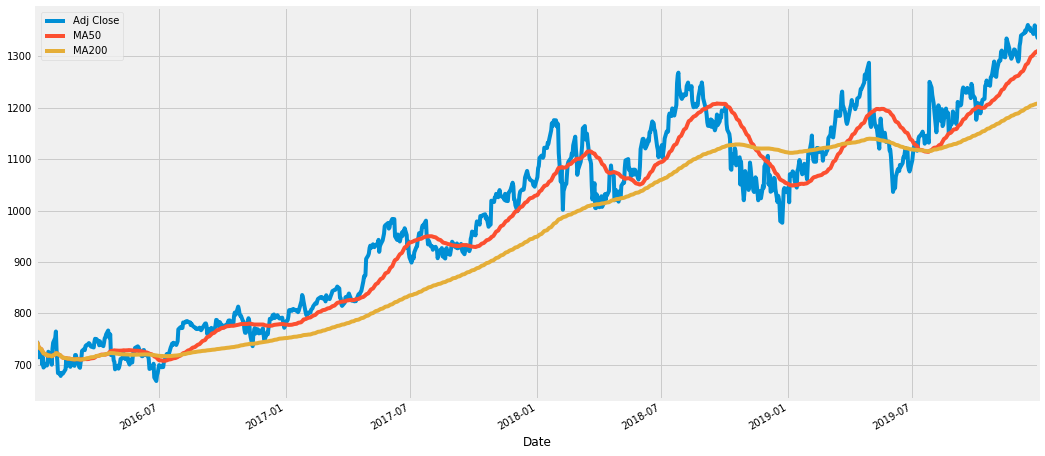

In [16]:
google['MA50']=google['Adj Close'].rolling(50, min_periods=0).mean()
google['MA200']=google['Adj Close'].rolling(200, min_periods=0).mean()
google[['Adj Close', 'MA50', 'MA200']].plot(figsize=(16,8))

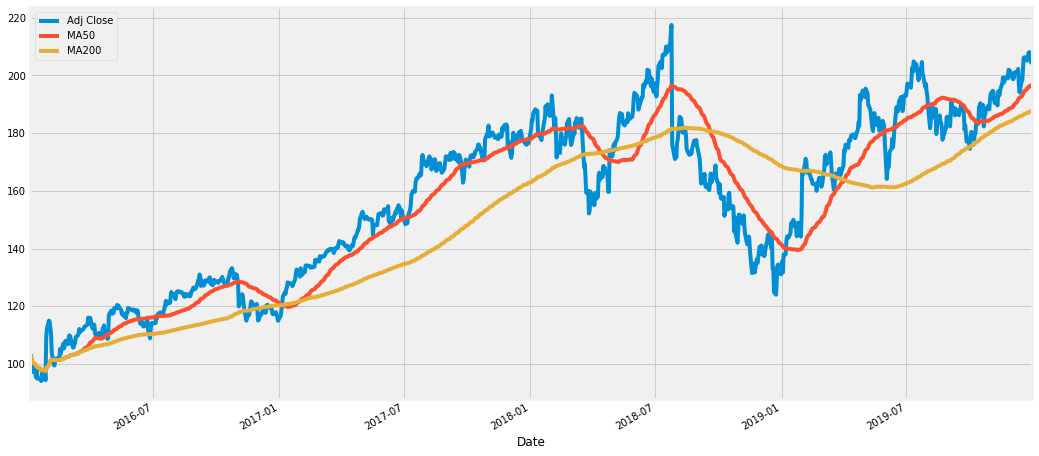

In [17]:
facebook['MA50'] = facebook['Adj Close'].rolling(50, min_periods=0).mean()
facebook['MA200'] = facebook['Adj Close'].rolling(200, min_periods=0).mean()
facebook[['Adj Close', 'MA50', 'MA200']].plot(figsize=(16,8))

# Check for relationship between stocks

In [18]:
from pandas.plotting import scatter_matrix

In [19]:
close_comp = pd.concat([amazon['Adj Close'], google['Adj Close'], facebook['Adj Close']], axis=1)

close_comp.columns=['Amazon', 'Google', 'Facebook']

In [20]:
close_comp.head()

,Amazon,Google,Facebook
Date,,,
2016-01-04,636.989990,741.840027,102.220001
2016-01-05,633.789978,742.580017,102.730003
2016-01-06,632.650024,743.619995,102.970001
2016-01-07,607.940002,726.390015,97.919998
2016-01-08,607.049988,714.469971,97.330002


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CBAD0F3E48>,
      dtype=object)

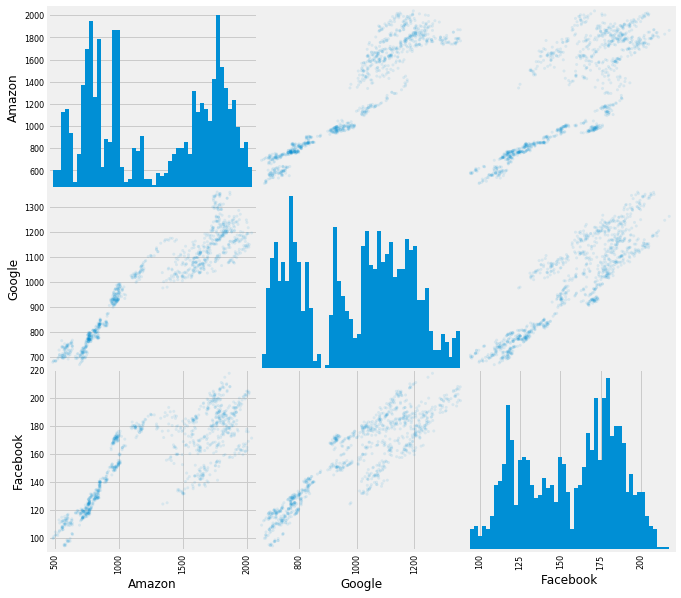

In [21]:
scatter_matrix(close_comp, figsize=(10,10), alpha=0.1, hist_kwds={'bins':50})

Nothing special here. Let's move on.

# Creating candlestick charts

In [22]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

In [23]:
amzn_ohlc = amazon['Adj Close'].resample('10D').ohlc()
amzn_volume = amazon['Volume'].resample('10D').sum()

In [24]:
amzn_ohlc.reset_index(inplace=True)

In [25]:
amzn_ohlc['Date']=amzn_ohlc['Date'].map(mdates.date2num)

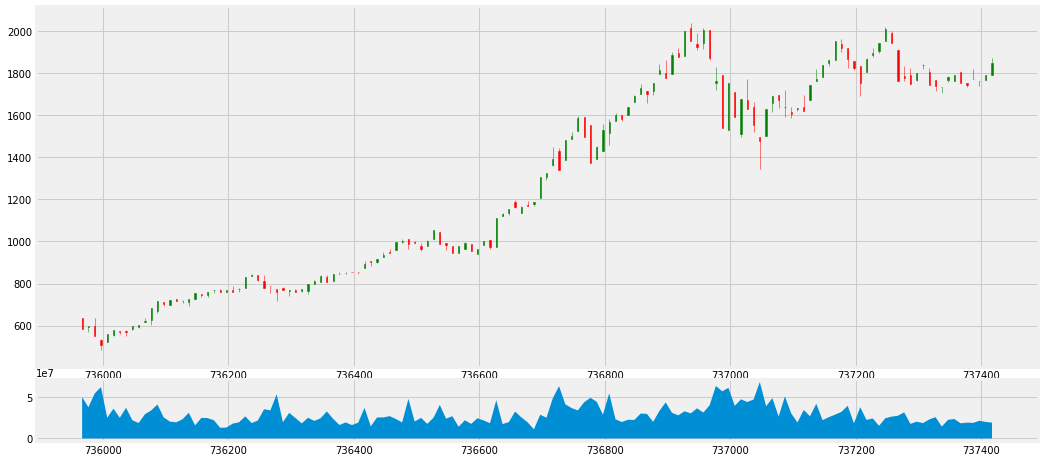

In [26]:
plt.figure(figsize=(16,8))
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

candlestick_ohlc(ax1, amzn_ohlc.values, width=2, colorup='g', colordown='r')
ax2.fill_between(amzn_volume.index.map(mdates.date2num), amzn_volume.values, 0)

plt.show()

In [27]:
google_ohlc = google['Adj Close'].resample('10D').ohlc()
google_volume = google['Adj Close'].resample('10D').sum()

In [28]:
google_ohlc.reset_index(inplace=True)

In [29]:
google_ohlc['Date']=google_ohlc['Date'].map(mdates.date2num)

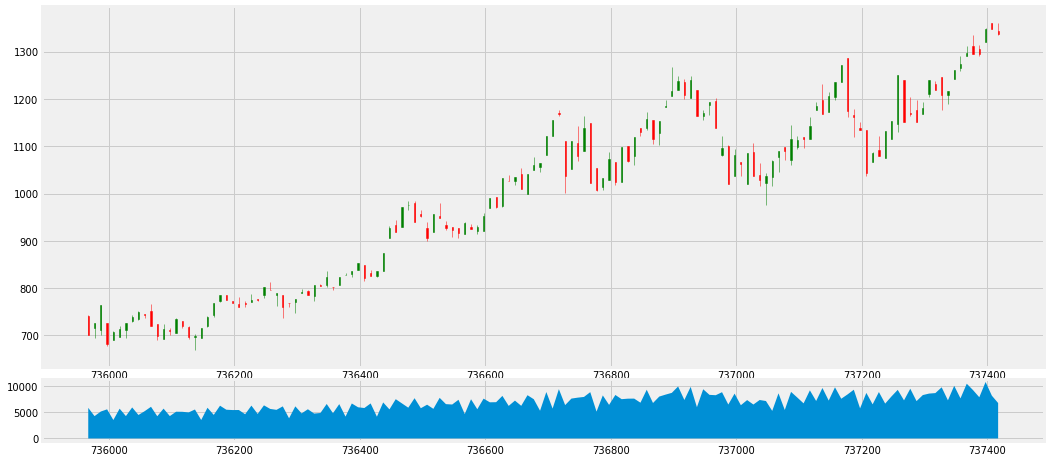

In [30]:
plt.figure(figsize=(16,8))

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

candlestick_ohlc(ax1, google_ohlc.values, width=2, colorup='g', colordown='r')
ax2.fill_between(google_volume.index.map(mdates.date2num), google_volume.values, 0)

plt.show()

In [31]:
facebook_ohlc = facebook['Adj Close'].resample('10D').ohlc()
facebook_volume = facebook['Adj Close'].resample('10D').sum()

In [32]:
facebook_ohlc.reset_index(inplace=True)

In [33]:
facebook_ohlc['Date'] = facebook_ohlc['Date'].map(mdates.date2num)

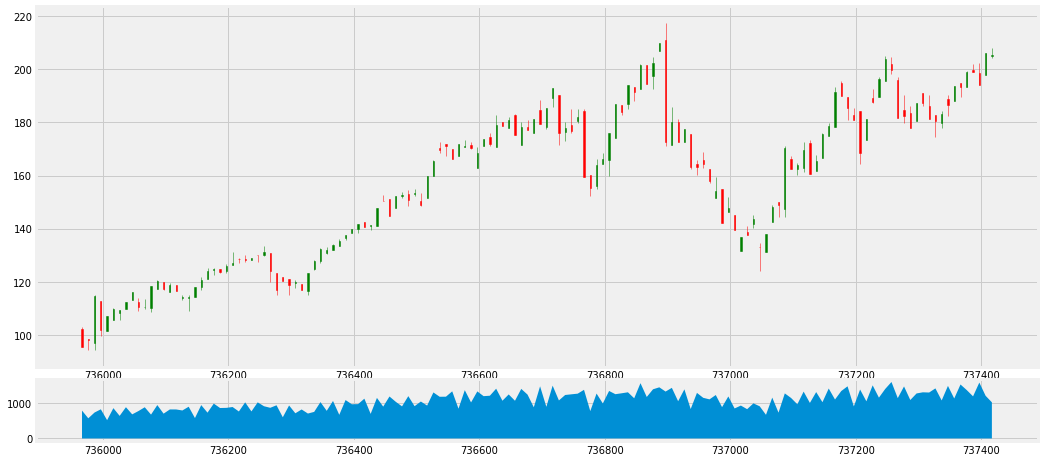

In [34]:
plt.figure(figsize=(16,8))

ax1=plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2=plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

candlestick_ohlc(ax1, facebook_ohlc.values, width=2, colorup='g', colordown='r')
ax2.fill_between(facebook_volume.index.map(mdates.date2num), facebook_volume.values, 0)

plt.show()

# Basic financial anaysis, by calulating and comparing daily returns

In [35]:
amazon['returns'] = amazon['Adj Close'].pct_change(1)
google['returns'] = google['Adj Close'].pct_change(1)
facebook['returns'] = facebook['Adj Close'].pct_change(1)

In [36]:
amazon.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2016-01-04,657.719971,627.510010,656.289978,636.989990,9314500,636.989990,6.113013e+09,636.989990,636.989990,NaN
2016-01-05,646.909973,627.650024,646.859985,633.789978,5822600,633.789978,3.766407e+09,635.389984,635.389984,-0.005024
2016-01-06,639.789978,620.309998,622.000000,632.650024,5329200,632.650024,3.314762e+09,634.476664,634.476664,-0.001799
2016-01-07,630.000000,605.210022,621.799988,607.940002,7074900,607.940002,4.399173e+09,627.842499,627.842499,-0.039058
2016-01-08,624.140015,606.000000,619.659973,607.049988,5512900,607.049988,3.416123e+09,623.683997,623.683997,-0.001464


In [37]:
google.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2016-01-04,744.059998,731.257996,743.000000,741.840027,3272800,741.840027,2.431690e+09,741.840027,741.840027,NaN
2016-01-05,752.000000,738.640015,746.450012,742.580017,1950700,742.580017,1.456100e+09,742.210022,742.210022,0.000998
2016-01-06,747.179993,728.919983,730.000000,743.619995,1947000,743.619995,1.421310e+09,742.680013,742.680013,0.001400
2016-01-07,738.500000,719.059998,730.309998,726.390015,2963700,726.390015,2.164420e+09,738.607513,738.607513,-0.023170
2016-01-08,733.229980,713.000000,731.450012,714.469971,2450900,714.469971,1.792711e+09,733.780005,733.780005,-0.016410


In [38]:
facebook.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2016-01-04,102.239998,99.750000,101.949997,102.220001,37912400,102.220001,3.865169e+09,102.220001,102.220001,NaN
2016-01-05,103.709999,101.669998,102.889999,102.730003,23258200,102.730003,2.393036e+09,102.475002,102.475002,0.004989
2016-01-06,103.769997,100.900002,101.129997,102.970001,25096200,102.970001,2.537979e+09,102.640002,102.640002,0.002336
2016-01-07,101.430000,97.300003,100.500000,97.919998,45172900,97.919998,4.539876e+09,101.460001,101.460001,-0.049043
2016-01-08,100.500000,97.029999,99.879997,97.330002,35402300,97.330002,3.535982e+09,100.634001,100.634001,-0.006025


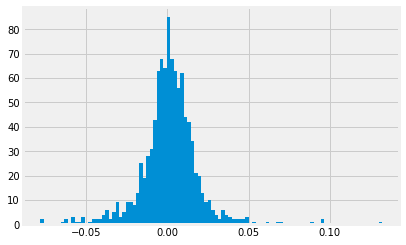

In [39]:
amazon['returns'].hist(bins=100)

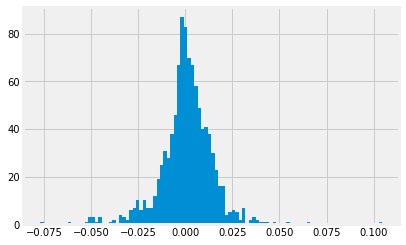

In [40]:
google['returns'].hist(bins=100)

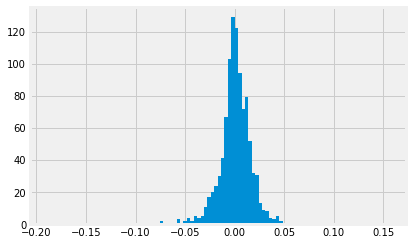

In [41]:
facebook['returns'].hist(bins=100)

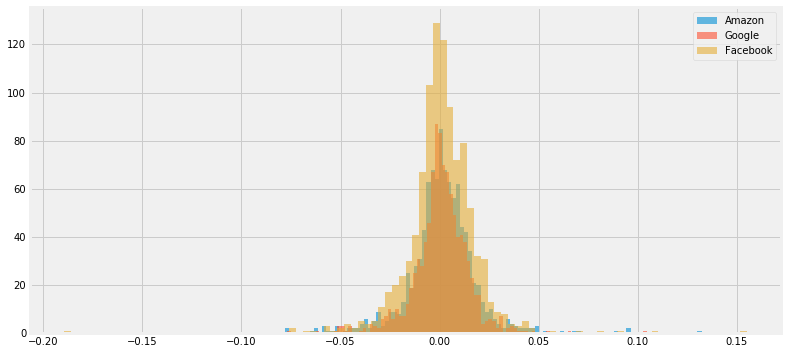

In [42]:
amazon['returns'].hist(bins=100, label='Amazon', figsize=(12,6), alpha=0.6)
google['returns'].hist(bins=100, label='Google', alpha=0.6)
facebook['returns'].hist(bins=100, label='Facebook', alpha=0.6)
plt.legend()
plt.show()

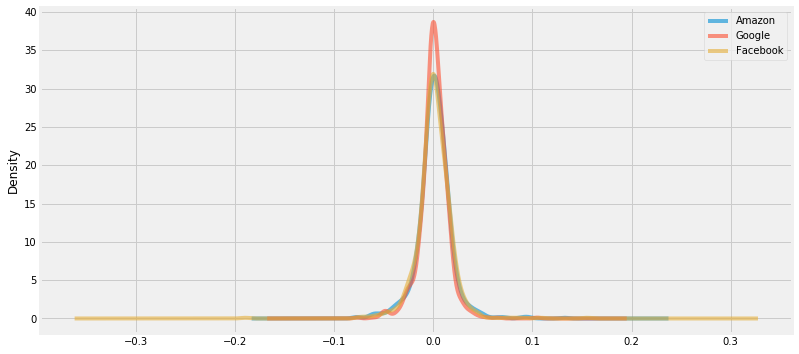

In [43]:
amazon['returns'].plot(kind='kde', label='Amazon', figsize=(12,6), alpha=0.6)
google['returns'].plot(kind='kde', label='Google', alpha=0.6)
facebook['returns'].plot(kind='kde', label='Facebook', alpha=0.6)
plt.legend()
plt.show()

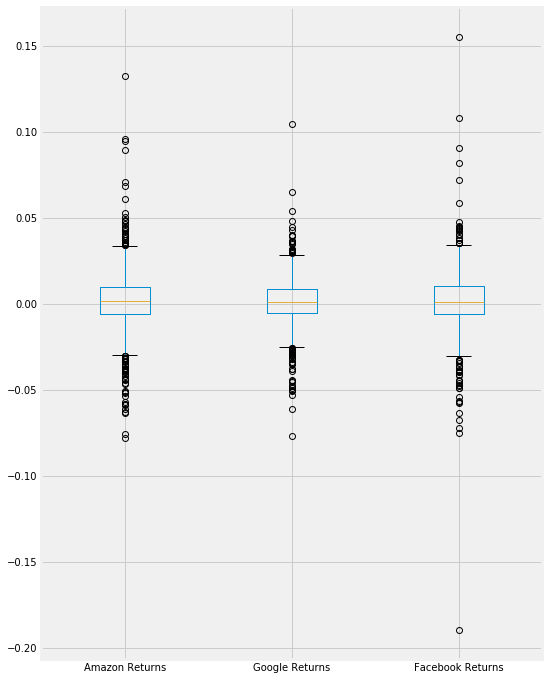

In [44]:
box_df=pd.concat([amazon['returns'], google['returns'], facebook['returns']], axis=1)
box_df.columns = ['Amazon Returns', 'Google Returns', 'Facebook Returns']
box_df.plot(kind='box', figsize=(8,12))

# Chceck for relationship between daily returns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CBAF24D4E0>,
      dtype=object)

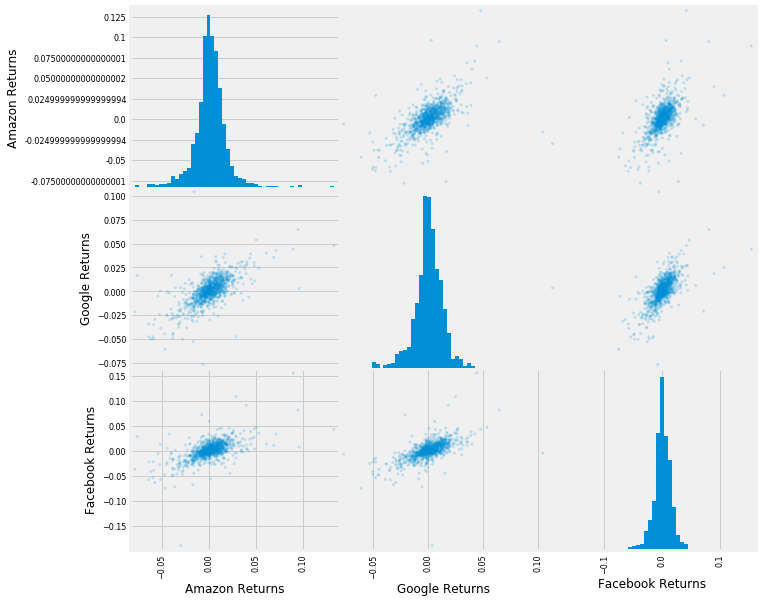

In [45]:
scatter_matrix(box_df, figsize=(10,10), alpha=0.2, hist_kwds={'bins':50})

It looks like amazon and facebook returns have some sort of possible relationship.

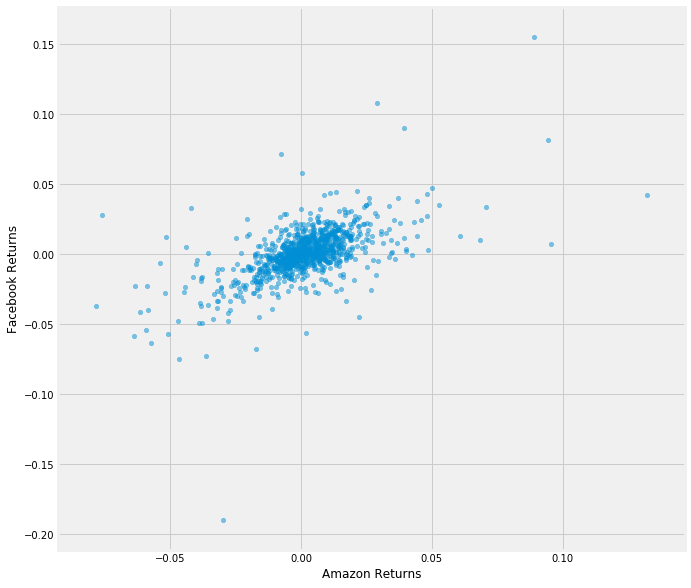

In [46]:
box_df.plot(kind='scatter', x='Amazon Returns', y='Facebook Returns', alpha=0.5, figsize=(10,10))

# Cumulative Daily Returns

In [47]:
amazon['Cumulative Return'] = (1 + amazon['returns']).cumprod()
google['Cumulative Return'] = (1 + google['returns']).cumprod()
facebook['Cumulative Return'] = (1 + facebook['returns']).cumprod()

In [48]:
amazon.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2016-01-04,657.719971,627.510010,656.289978,636.989990,9314500,636.989990,6.113013e+09,636.989990,636.989990,NaN,NaN
2016-01-05,646.909973,627.650024,646.859985,633.789978,5822600,633.789978,3.766407e+09,635.389984,635.389984,-0.005024,0.994976
2016-01-06,639.789978,620.309998,622.000000,632.650024,5329200,632.650024,3.314762e+09,634.476664,634.476664,-0.001799,0.993187
2016-01-07,630.000000,605.210022,621.799988,607.940002,7074900,607.940002,4.399173e+09,627.842499,627.842499,-0.039058,0.954395
2016-01-08,624.140015,606.000000,619.659973,607.049988,5512900,607.049988,3.416123e+09,623.683997,623.683997,-0.001464,0.952998


In [49]:
google.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2016-01-04,744.059998,731.257996,743.000000,741.840027,3272800,741.840027,2.431690e+09,741.840027,741.840027,NaN,NaN
2016-01-05,752.000000,738.640015,746.450012,742.580017,1950700,742.580017,1.456100e+09,742.210022,742.210022,0.000998,1.000998
2016-01-06,747.179993,728.919983,730.000000,743.619995,1947000,743.619995,1.421310e+09,742.680013,742.680013,0.001400,1.002399
2016-01-07,738.500000,719.059998,730.309998,726.390015,2963700,726.390015,2.164420e+09,738.607513,738.607513,-0.023170,0.979173
2016-01-08,733.229980,713.000000,731.450012,714.469971,2450900,714.469971,1.792711e+09,733.780005,733.780005,-0.016410,0.963105


In [50]:
facebook.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2016-01-04,102.239998,99.750000,101.949997,102.220001,37912400,102.220001,3.865169e+09,102.220001,102.220001,NaN,NaN
2016-01-05,103.709999,101.669998,102.889999,102.730003,23258200,102.730003,2.393036e+09,102.475002,102.475002,0.004989,1.004989
2016-01-06,103.769997,100.900002,101.129997,102.970001,25096200,102.970001,2.537979e+09,102.640002,102.640002,0.002336,1.007337
2016-01-07,101.430000,97.300003,100.500000,97.919998,45172900,97.919998,4.539876e+09,101.460001,101.460001,-0.049043,0.957934
2016-01-08,100.500000,97.029999,99.879997,97.330002,35402300,97.330002,3.535982e+09,100.634001,100.634001,-0.006025,0.952162


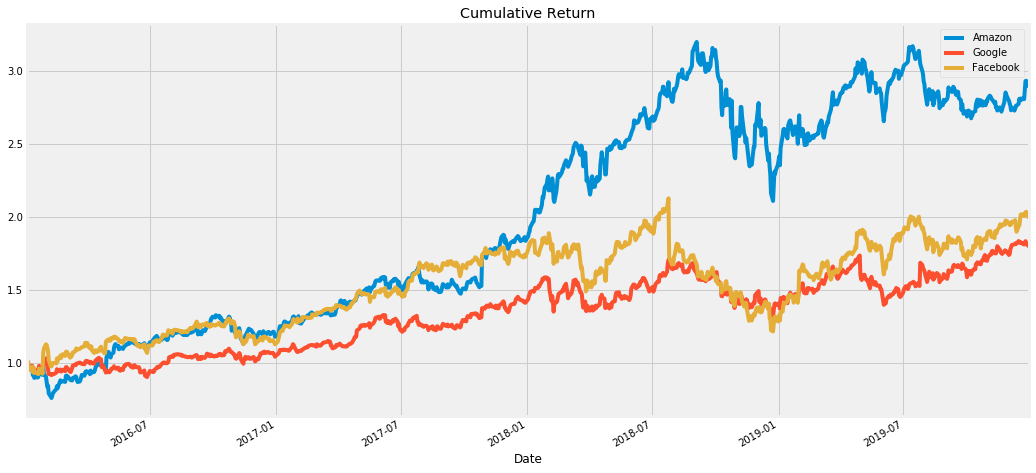

In [51]:
amazon['Cumulative Return'].plot(label='Amazon', figsize=(16,8), title='Cumulative Return')
google['Cumulative Return'].plot(label='Google')
facebook['Cumulative Return'].plot(label='Facebook')
plt.legend()
plt.show()